In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st #chi-2
import statsmodels.api as sm
import math

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
transactions = pd.read_csv('transactions2.csv', parse_dates = True)
products = pd.read_csv('products2.csv')
customers = pd.read_csv('customers2.csv')

<big><b>1 - Analyse des clients</b></big>

In [3]:
#On passe "sex" en variable catégorielle
customers.reset_index()
customers = customers[['client_id', 'sex', 'birth']]
customers['sex'] = customers['sex'].astype('category')
customers = customers.replace('f', 'F') 
customers = customers.replace('m', 'M')
customers = customers.sort_values('client_id')
print(customers.head())
print(customers.dtypes)

     client_id sex  birth
4298       c_1   M   1955
6893      c_10   M   1956
2137     c_100   M   1992
8471    c_1000   F   1966
3425    c_1001   M   1982
client_id      object
sex          category
birth           int64
dtype: object


In [4]:
#On ajoute une colonne âge
customers['age'] = 2022 - customers['birth']
print(customers.head())

     client_id sex  birth  age
4298       c_1   M   1955   67
6893      c_10   M   1956   66
2137     c_100   M   1992   30
8471    c_1000   F   1966   56
3425    c_1001   M   1982   40


In [5]:
#Et on définit des classes d'âge dans lesquelles ranger les clients
cut_bins = [17, 31, 51, 94]
cut_labels = ['18-30', '31-50', '51+']
customers['classe_age'] = pd.cut(customers['age'], bins=cut_bins, labels=cut_labels)
print(customers.head())

     client_id sex  birth  age classe_age
4298       c_1   M   1955   67        51+
6893      c_10   M   1956   66        51+
2137     c_100   M   1992   30      18-30
8471    c_1000   F   1966   56        51+
3425    c_1001   M   1982   40      31-50


C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


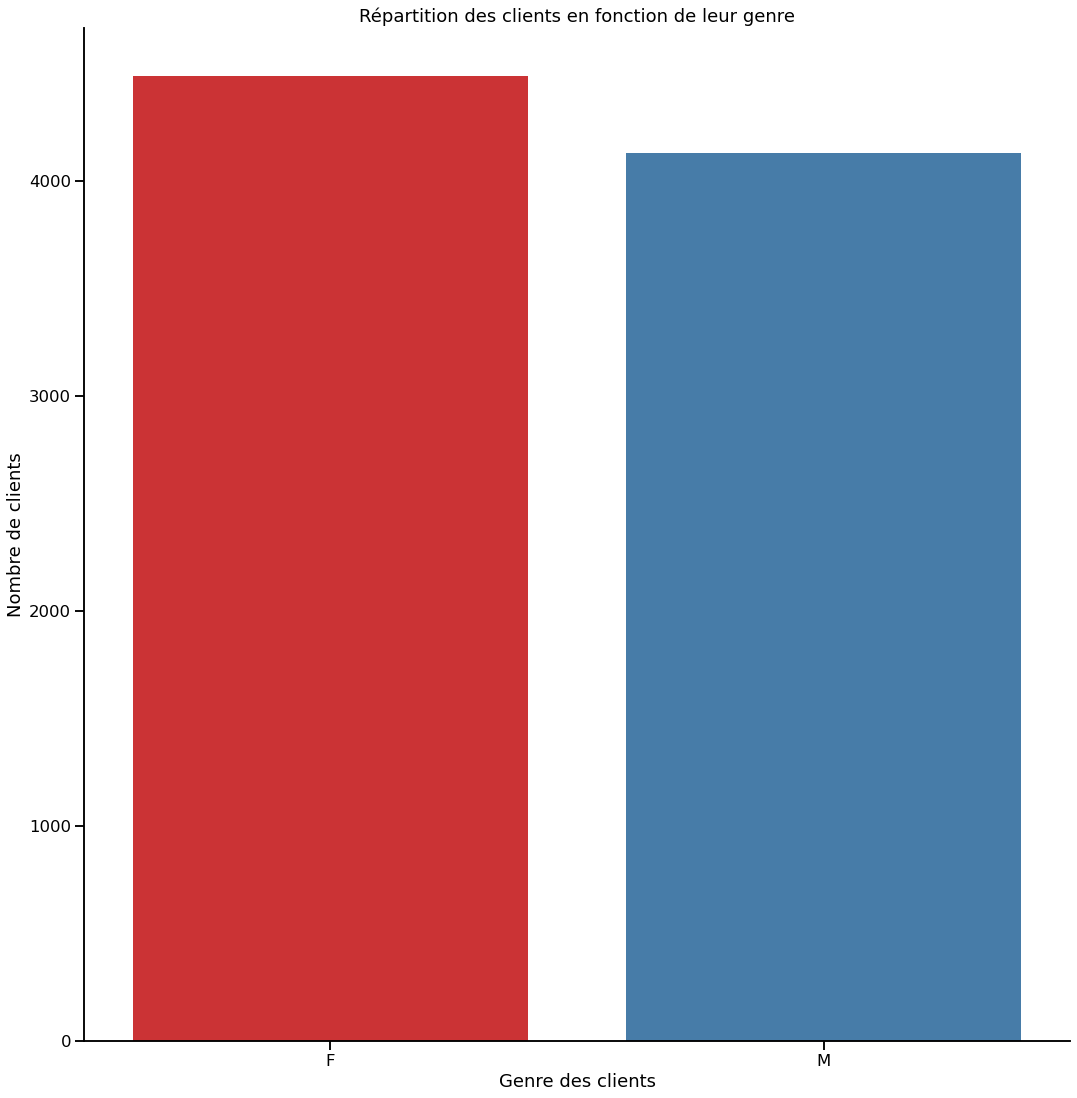

In [6]:
#Analyse de la répartition hommes/femmes
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('sex', data=customers, kind='count', height=15)
_ = plt.xlabel('Genre des clients')
_ = plt.ylabel('Nombre de clients')
_ = plt.title('Répartition des clients en fonction de leur genre')
_ = plt.savefig('1 - Répartition HF.jpg')
_ = plt.show()

In [7]:
#La répartition est à peu près équivalente, comme dans la population générale il y a un peu plus de femmes.
#On peut créer 2 dataframes pour de futures analyses.
customers_f = customers[customers['sex']=='F']
customers_m = customers[customers['sex']=='M']

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

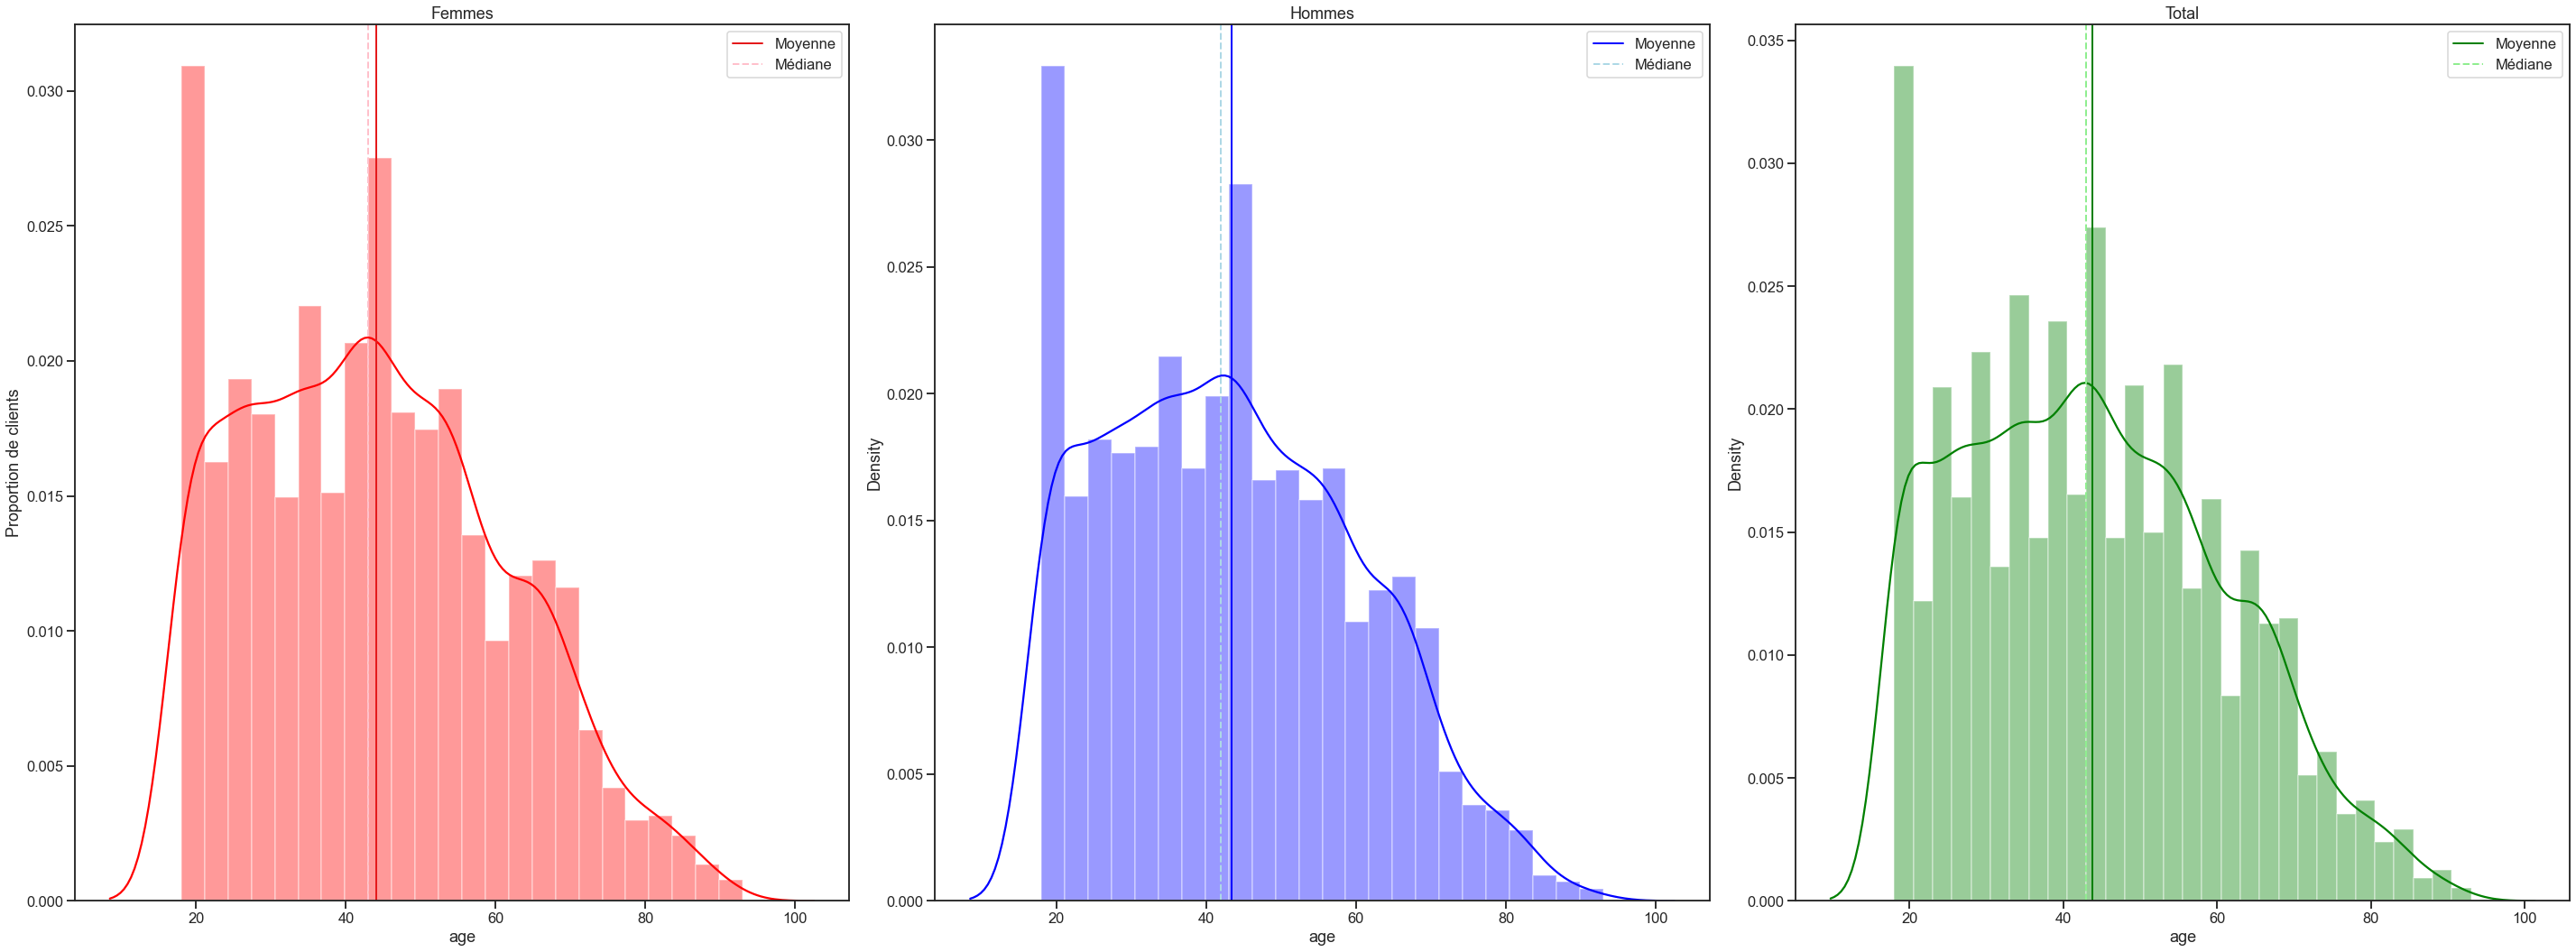

In [8]:
#Répartition de l'âge en fonction du genre
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize = (40,15))

_ = plt.subplot(1, 3, 1)
_ = sns.distplot(customers_f['age'], color='red')
_ = plt.axvline(x=customers_f['age'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=customers_f['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='pink')
_ = plt.ylabel('Proportion de clients')
_ = plt.title('Femmes')
_ = plt.legend()

_ = plt.subplot(1,3,2)
_ = sns.distplot(customers_m['age'], color='blue')
_ = plt.axvline(x=customers_m['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='b')
_ = plt.axvline(x=customers_m['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightblue')
_ = plt.title('Hommes')
_ = plt.legend()

_ = plt.subplot(1,3,3)
_ = sns.distplot(customers['age'], color='green')
_ = plt.axvline(x=customers['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='g')
_ = plt.axvline(x=customers['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightgreen')
_ = plt.title('Total')
_ = plt.legend()

_ = plt.tight_layout()

_ = plt.savefig('2 - Répartition des âges.jpg')
_ = plt.show()

In [9]:
fem_skew = st.skew(customers_f['age'])
mal_skew = st.skew(customers_m['age'])
skew_total = st.skew(customers['age'])
print('Skewness Femmes = ' + str(fem_skew) + ' ; Skewness Hommes = ' + str(mal_skew) + ' ; Skewness Total = ' + str(skew_total))

Skewness Femmes = 0.3733111568791258 ; Skewness Hommes = 0.3438126359703028 ; Skewness Total = 0.36075109938550914


In [10]:
fem_kurt = st.kurtosis(customers_f['age'])
mal_kurt = st.kurtosis(customers_m['age'])
kurt_total = st.kurtosis(customers['age'])
print('Kurtosis Femmes = ' + str(fem_kurt) + ' ; Kurtosis Hommes = ' + str(mal_kurt) + ' ; Kurtosis Total = ' + str(kurt_total))

Kurtosis Femmes = -0.6122367483683164 ; Kurtosis Hommes = -0.6739856402878859 ; Kurtosis Total = -0.6369914555526575


In [11]:
print(customers_f.describe())
print(customers_m.describe())
print(customers.describe())

             birth          age
count  4490.000000  4490.000000
mean   1977.989755    44.010245
std      17.096698    17.096698
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  4131.000000  4131.000000
mean   1978.586299    43.413701
std      16.718043    16.718043
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1980.000000    42.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  8621.000000  8621.000000
mean   1978.275606    43.724394
std      16.917958    16.917958
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000


On peut remarquer que le nombre de clients ayant 18 ans est disproportioné par rapport aux autres âges. Il est probable que ce soit le site qui limite l'inscription aux plus de 18 ans, ceux de moins de 18 ans s'inscrivant avec cet âge.

Le skewness étant proche de zéro, la distribution des âges chez les femmes et les hommes est relativement symétrique. 
Le kurtosis proche de zéro aussi, indique que la courbe est plutôt plate et donc que la distribution des âges est plutôt concentrée autour de ses centres de probabilité.

<big><b>2 - Analyse des produits</b></big>

In [12]:
#Réinitialisation de l'index et de catégories
products.reset_index()
products = products[['id_prod', 'price', 'categ']]
products['categ'] = products['categ'].astype('category')
print(products.head())
products.dtypes

  id_prod  price categ
0  0_1421  19.99     0
1  0_1368   5.13     0
2   0_731  17.99     0
3   1_587   4.99     1
4  0_1507   3.99     0


id_prod      object
price       float64
categ      category
dtype: object

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


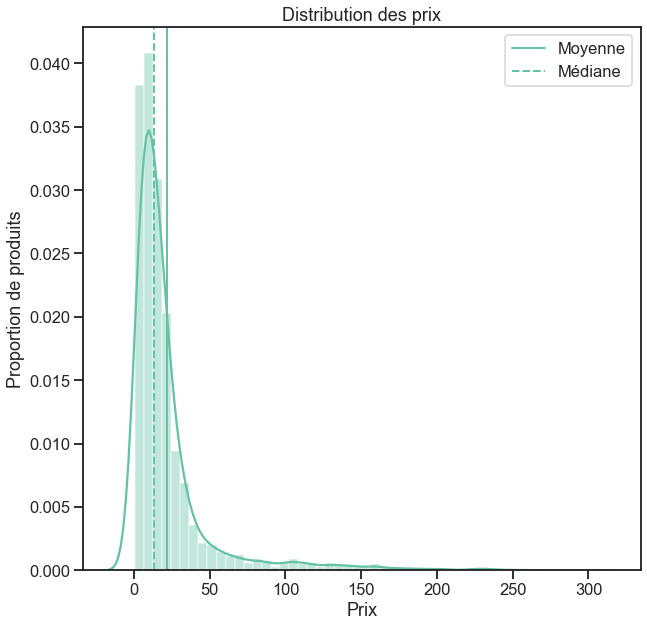

In [13]:
#Distribution des prix des produits
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = plt.figure(figsize = (10,10))
_ = sns.distplot(products['price'])
_ = plt.axvline(x=products['price'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=products['price'].median(), label='Médiane', linestyle='--', linewidth=2)
_ = plt.xlabel('Prix')
_ = plt.ylabel('Proportion de produits')
_ = plt.title('Distribution des prix')
_ = plt.legend()

_ = plt.savefig('3 - Distribution des prix.jpg')
_ = plt.show()

In [14]:
#Skewness des prix
products_skew = st.skew(products['price'])
print('Skewness des prix : ', products_skew)

Skewness des prix :  3.797349751607727


In [15]:
print(products.describe())

             price
count  3287.000000
mean     21.860511
std      29.845768
min       0.620000
25%       6.990000
50%      13.060000
75%      22.990000
max     300.000000


Cette fois, avec un skewness positif, la distribution des valeurs des prix est asymétrique. 
Le prix moyen des produits est de 21,86 EUR (std: 29,84 EUR) et la médiane est de 13,07 EUR. La médiane est plus précise que la moyenne dans ce cas car elle n'est pas sensible aux outliers (article à 300 EUR). L'asymétrie vers la gauche (positive skew) des prix montre que la plupart des produits ont des petits prix.

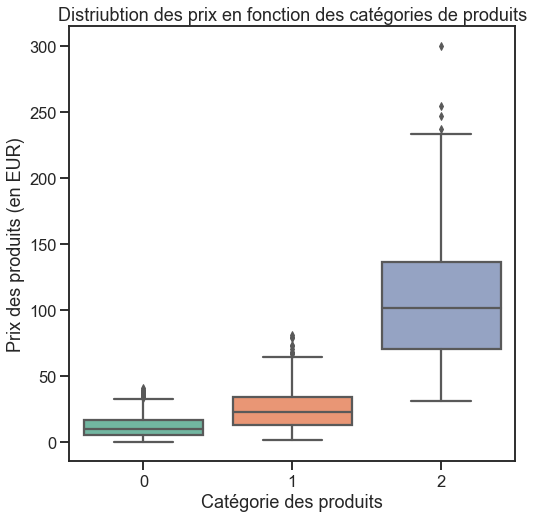

In [16]:
#Distribution des prix en fonction des catégories de produits
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=(8,8))

_ = sns.boxplot(data=products, x='categ', y='price')
_ = plt.xlabel('Catégorie des produits')
_ = plt.ylabel('Prix des produits (en EUR)')
_ = plt.title('Distriubtion des prix en fonction des catégories de produits')

_ = plt.savefig('4 - Répartition des produits par catégorie.jpg')

_ = plt.show()

On peut observer que chaque catégorie de produit correspond à une fourchette de prix de différent ordre, la catégorie 2 ayant les prix les plus élevés et, la 0, les moins élevés.

<big><b>3 - Analyse des transactions</b></big>

In [17]:
#Passage de la date en datetime et création d'une nouvelle colonne
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'] = transactions['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['mois-année'] = transactions['date'].apply(lambda x: x.strftime("%b %Y"))
transactions.head()

,date,id_prod,session_id,client_id,id_prod_prod,client_id_custom,mois-année
0,2021-03-01,0_1259,s_1,c_329,True,True,Mar 2021
1,2021-03-01,0_1390,s_2,c_664,True,True,Mar 2021
2,2021-03-01,0_1352,s_3,c_580,True,True,Mar 2021
3,2021-03-01,0_1458,s_4,c_7912,True,True,Mar 2021
4,2021-03-01,0_1358,s_5,c_2033,True,True,Mar 2021


C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


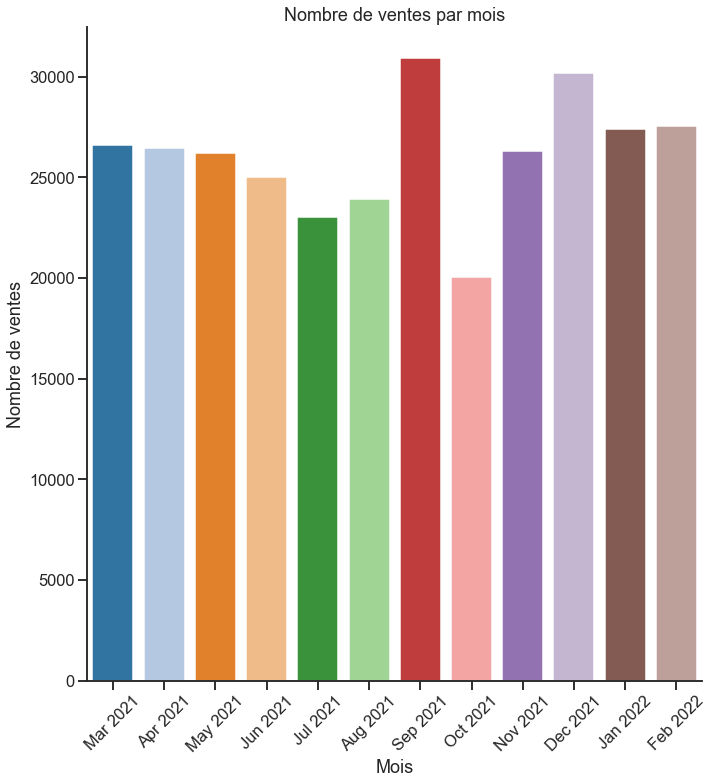

In [18]:
#Analyse du nombre de ventes par mois
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('tab20')

_ = sns.catplot('mois-année', data=transactions, kind='count', height=10)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes par mois')

_ = plt.savefig('5 - Nombre de ventes mensuelles.jpg')

_ = plt.show()

On peut observer que les ventes augmentent fortement en septembre, pour retomber en dessous de la moyenne annuelle de ventes, puis remontent à peu près au même niveau en décembre.

In [19]:
df = pd.merge(transactions, customers, on = 'client_id')
df = pd.merge(df, products, on = 'id_prod')
transactions_ca = df.groupby('mois-année').sum().reset_index()
transactions_ca['mois-année'] = pd.to_datetime(transactions_ca['mois-année'])
transactions_ca = transactions_ca.sort_values('mois-année')
transactions_ca['cumulprice'] = transactions_ca['price'].cumsum()
transactions_ca = transactions_ca[['mois-année', 'price', 'cumulprice']]

print(transactions_ca)
print('Total du chiffre d\'affaire :', round(transactions_ca['price'].sum(), 2))

   mois-année      price    cumulprice
7  2021-03-01  443044.59  4.430446e+05
0  2021-04-01  436338.19  8.793828e+05
8  2021-05-01  451405.70  1.330788e+06
6  2021-06-01  444937.79  1.775726e+06
5  2021-07-01  445703.29  2.221430e+06
1  2021-08-01  443277.16  2.664707e+06
11 2021-09-01  466891.00  3.131598e+06
10 2021-10-01  295320.59  3.426918e+06
9  2021-11-01  475229.68  3.902148e+06
2  2021-12-01  484825.84  4.386974e+06
4  2022-01-01  486633.98  4.873608e+06
3  2022-02-01  490225.43  5.363833e+06
Total du chiffre d'affaire : 5363833.24


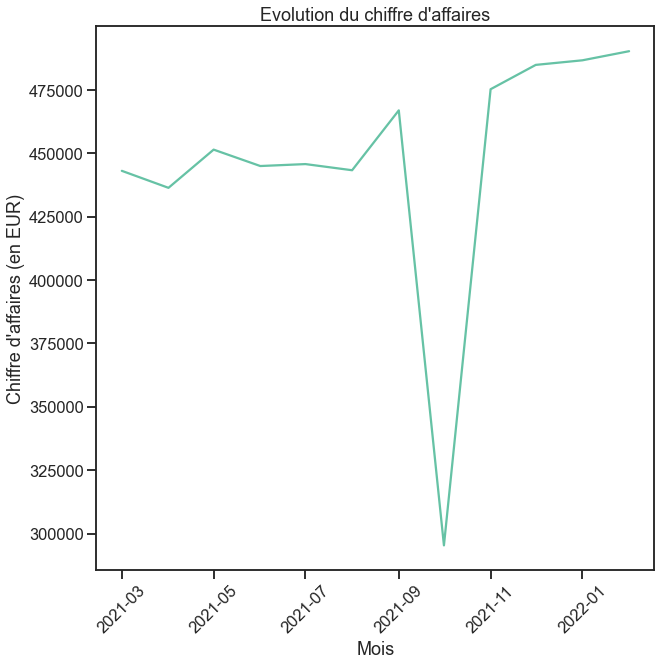

In [20]:
#évolution du ca
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

_ = plt.plot(transactions_ca['mois-année'], transactions_ca['price'])
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Chiffre d\'affaires (en EUR)')
_ = plt.title('Evolution du chiffre d\'affaires')

_ = plt.savefig('6 - CA mensuel.jpg')

_ = plt.show()

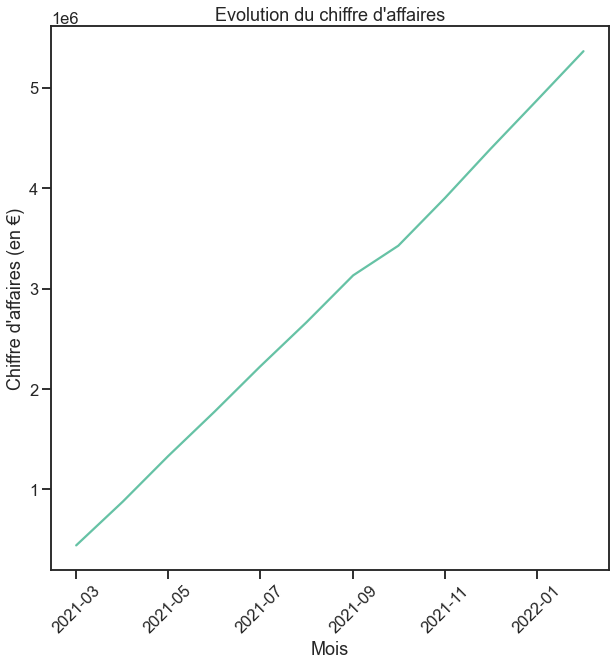

In [21]:
#évolution du ca cumulée

sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

_ = plt.plot(transactions_ca['mois-année'], transactions_ca['cumulprice'])
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Chiffre d\'affaires (en €)')
_ = plt.title('Evolution du chiffre d\'affaires')

_ = plt.savefig('7 - CA cumulé.jpg')

_ = plt.show()

In [22]:
#Pour comprendre pourquoi le CA baisse au mois d'octobre, il faut analyser le CA par catégorie de produit.
transactions = transactions.reset_index()
transactions_2 = pd.merge(transactions, products, on = ['id_prod'])
transactions_2.head()

,index,date,id_prod,session_id,client_id,id_prod_prod,client_id_custom,mois-année,price,categ
0,0,2021-03-01,0_1259,s_1,c_329,True,True,Mar 2021,11.99,0
1,401,2021-03-01,0_1259,s_202,c_1599,True,True,Mar 2021,11.99,0
2,3934,2021-03-05,0_1259,s_2114,c_107,True,True,Mar 2021,11.99,0
3,5563,2021-03-07,0_1259,s_2976,c_4215,True,True,Mar 2021,11.99,0
4,7694,2021-03-09,0_1259,s_4088,c_174,True,True,Mar 2021,11.99,0


In [23]:
transactions_2['mois-année'] = pd.to_datetime(transactions_2['date'])
transactions_2['mois-année'] = transactions_2['date'].apply(lambda x: x.strftime("%b %Y"))
transactions_2.head()

,index,date,id_prod,session_id,client_id,id_prod_prod,client_id_custom,mois-année,price,categ
0,0,2021-03-01,0_1259,s_1,c_329,True,True,Mar 2021,11.99,0
1,401,2021-03-01,0_1259,s_202,c_1599,True,True,Mar 2021,11.99,0
2,3934,2021-03-05,0_1259,s_2114,c_107,True,True,Mar 2021,11.99,0
3,5563,2021-03-07,0_1259,s_2976,c_4215,True,True,Mar 2021,11.99,0
4,7694,2021-03-09,0_1259,s_4088,c_174,True,True,Mar 2021,11.99,0


C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


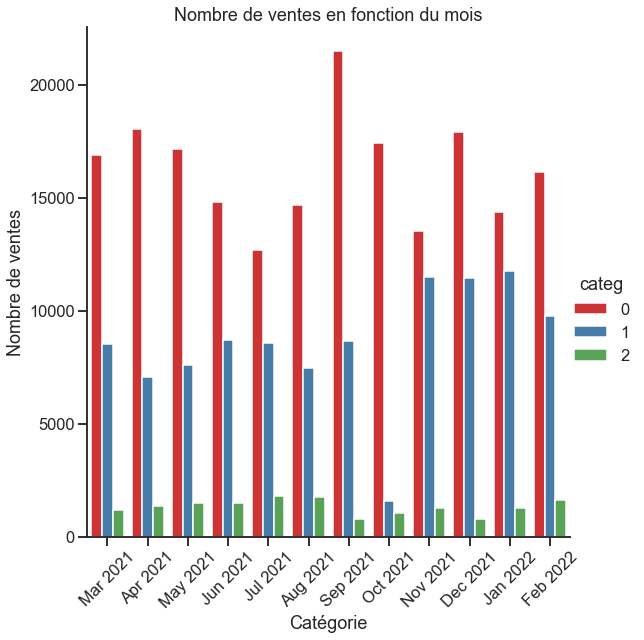

In [24]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('mois-année', data=transactions_2, hue='categ', kind='count', height=8)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Catégorie')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes en fonction du mois')
_ = plt.savefig('8 - Nombre de ventes par mois et par catégorie.jpg')

_ = plt.show()

Ce sont les ventes de la catégorie 1 qui chutent presque totalement en octobre tout en restant relativement similaire le reste des autres mois. Il doit y avoir une perte de données.

C:\Users\maxim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


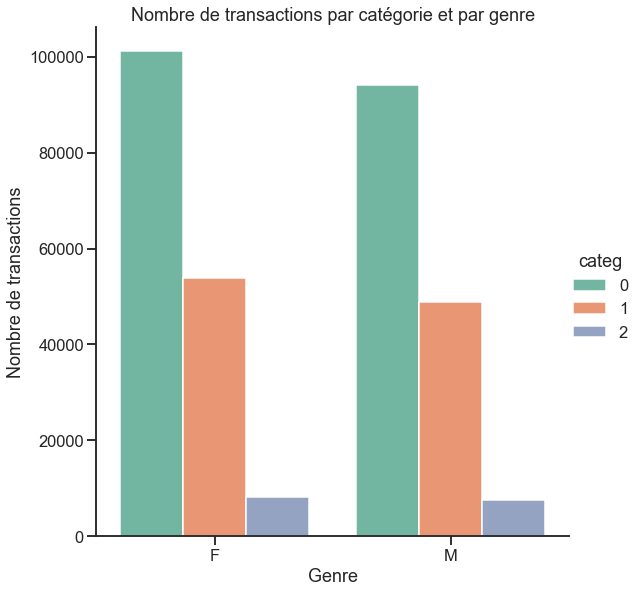

In [25]:
#Transactions par genre et catégorie de produits
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = sns.catplot('sex', hue='categ', data=df, kind='count', height=8)
_ = plt.xlabel('Genre')
_ = plt.ylabel('Nombre de transactions')
_ = plt.title('Nombre de transactions par catégorie et par genre')

_ = plt.savefig('9 - Nombre de transactions par genre et catégorie.jpg')

_ = plt.show()

On peut observer que le genre n'influence pas la catégorie du produit acheté.

<big><b>4 - Analyse de concentration (Courbe de Lorenz et indice de Gini)</b></big>

In [26]:
#On analyse la concentration des âges
df_customers = df
df_customers['count'] = 1
df_customers = df.groupby('client_id').sum().reset_index()
df_customers = df_customers.sort_values('count', ascending=False)
df_customers = df_customers[['client_id', 'count']]
df_customers = pd.merge(df_customers, customers, on='client_id')
df_customers = df_customers.sort_values('count', ascending=False)
top_10 = df_customers.iloc[0:10]
print(top_10)

  client_id  count sex  birth  age classe_age
0    c_2140    195   F   1977   45      31-50
1    c_7959    195   F   1974   48      31-50
2    c_8026    193   M   1978   44      31-50
3    c_2595    193   M   1974   48      31-50
4    c_3725    190   F   1980   42      31-50
5    c_8392    189   F   1978   44      31-50
6    c_7421    189   M   1978   44      31-50
7    c_3263    188   F   1985   37      31-50
8    c_2077    188   F   1984   38      31-50
9    c_8556    187   M   1976   46      31-50


In [27]:
df_products = df
df_products['count'] = 1
df_products = df_products.groupby('id_prod').sum().reset_index()
df_products = df_products.sort_values('count', ascending=False)
df_products = df_products[['id_prod', 'count']]
df_products = pd.merge(df_products, products, on=['id_prod'])
top_10_prod = df_products.iloc[0:10]
print(top_10_prod)

  id_prod  count  price categ
0   1_369   1015  23.99     1
1   1_417    996  20.99     1
2   1_414    966  23.83     1
3   1_498    955  23.37     1
4   1_425    941  16.99     1
5   1_413    896  17.99     1
6   1_398    891  10.17     1
7   1_412    884  16.65     1
8   1_406    881  24.81     1
9   1_407    878  15.99     1


In [28]:
df_age = df.groupby('age').sum().reset_index()
df_age['cum_achat'] = df_age['count'].cumsum()

In [29]:
def gini(arr):
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df_age['cum_achat'])
print('Indice de Gini : ', gini(X))

Indice de Gini :  0.2945215743588001


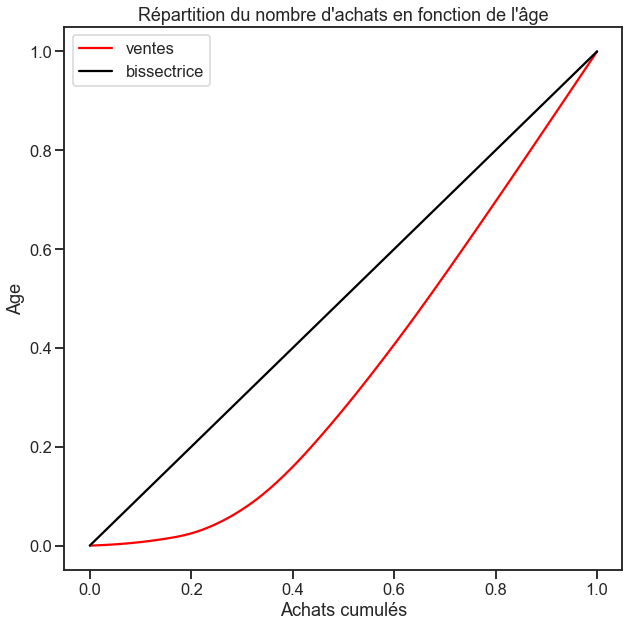

In [30]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
_ = ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', label='ventes')
_ = ax.plot([0,1], [0,1], color='k', label='bissectrice')
_ = plt.xlabel('Achats cumulés')
_ = plt.ylabel('Age')
_ = plt.title('Répartition du nombre d\'achats en fonction de l\'âge')
_ = plt.legend()

_ = plt.savefig('10 - Courbe de Lorenz.jpg')

_ = plt.show()

<big><b>5 - Analyses bivariées</b></big>

5.1 - Corrélation entre le genre des clients et la catégorie des achats

In [31]:
df_categ = df[['sex', 'categ']]
df_categ = df_categ.astype('str')

In [32]:
X = 'sex'
Y = 'categ'
cont = df_categ[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')
cont

categ,0,1,2,Total
sex,,,,
F,101206,53774,8122,163102
M,94064,48851,7634,150549
Total,195270,102625,15756,313651


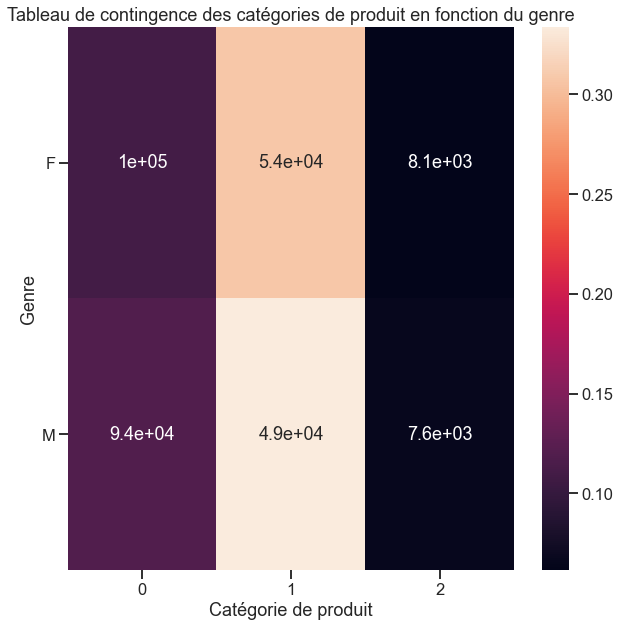

In [33]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Catégorie de produit')
_ = plt.ylabel('Genre')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des catégories de produit en fonction du genre')

_ = plt.savefig('11 - Tableau de contingences catégories par genre.jpg')

_ = plt.show()

In [34]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  10.11086551372657
chi-squared : 10.110865513726571
p-value : 0.12006020526443334


La femmes achètent davantage de produits des catégories 1 et 2, tandis que les hommes sont beaucoup plus susceptibles que les femmes d'achèter dans la catégorie 0.

Cependant le calcul de la p-value montre en revanche que cette non indépendance n'est pas significative statistiquement.

4.2 - Corrélation entre l'âge des clients et le montant total des achats

In [35]:
df_age = df
df_age = df_age.groupby(by=['client_id', 'age']).sum()
df_age = df_age.reset_index()
df_age.head()

,client_id,age,id_prod_prod,client_id_custom,birth,price,count
0,c_1,67,20,20,39100,300.65,20
1,c_10,66,28,28,54768,586.18,28
2,c_100,30,6,6,11952,222.87,6
3,c_1000,56,56,56,110096,980.02,56
4,c_1001,40,58,58,114956,1102.45,58


In [36]:
x = df_age['age']
y = df_age['price']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_age['price']
X = df_age[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']
print('r-squared : ', (st.pearsonr(x,y)[0])**2)

rho de pearson : -0.19036092308664992
indice de covariation : -1471.4425747585478
r-squared :  0.036237281038401445


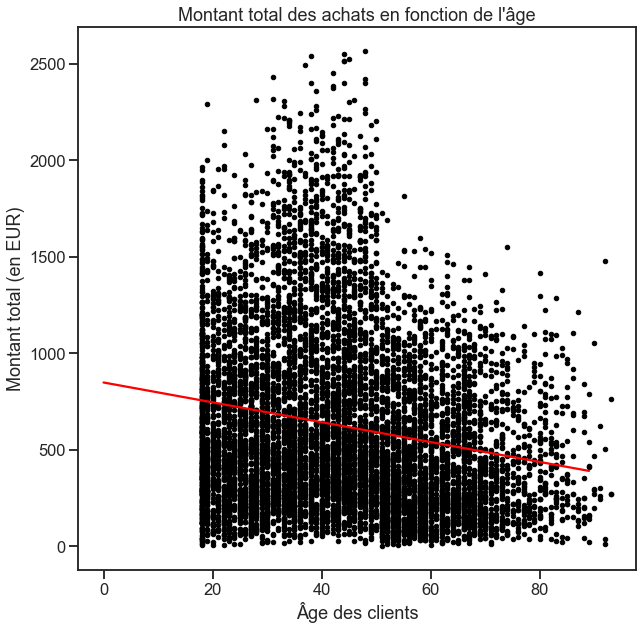

In [37]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_age.age,df_age.price, ".", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Âge des clients")
_ = plt.ylabel("Montant total (en EUR)")
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig('12 - Régression montant achat par age.jpg')

_ = plt.show()

Le coefficient de Pearson et le R² ne montrent pas de corrélation entre l'âge des clients et le montant total des achats.

4.3 - Corrélation entre l'âge des clients et la fréquence d’achat

In [38]:
df_freq = df
df_freq['nb_achat'] = 1
df_freq = df.groupby(['mois-année', 'age', 'session_id']).sum().reset_index()
df_freq['mois-année'] = pd.to_datetime(df_freq['mois-année']) 
df_freq = df_freq[['mois-année', 'age', 'nb_achat']]
df_freq = df_freq.sort_values(['mois-année', 'age'])
df_freq['freq_achat'] = df_freq['nb_achat']/df['nb_achat'].sum()
df_freq.head()

,mois-année,age,nb_achat,freq_achat
93167,2021-03-01,18,2,0.000006
93168,2021-03-01,18,1,0.000003
93169,2021-03-01,18,6,0.000019
93170,2021-03-01,18,1,0.000003
93171,2021-03-01,18,2,0.000006


In [39]:
x = df_freq['age']
y = df_freq['freq_achat']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_freq['freq_achat']
X = df_freq[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.19398010753704648
indice de covariation : -1.1909819331810059e-05
r-squared :  0.037628282120084115


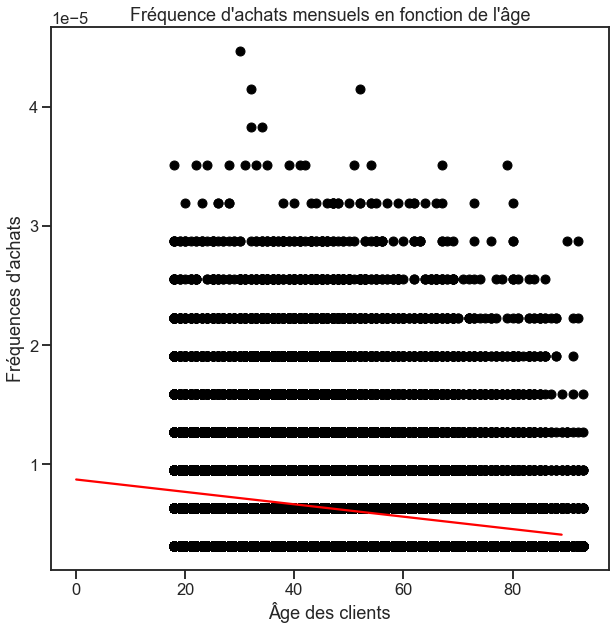

In [40]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_freq.age,df_freq.freq_achat, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Âge des clients")
_ = plt.ylabel("Fréquences d'achats")
_ = plt.title('Fréquence d\'achats mensuels en fonction de l\'âge')

_ = plt.savefig('13 - Fréquence achat mensuels par age.jpg')

_ = plt.show()

Le coefficient de Pearson et le R² ne montrent pas de corrélation entre nos données. On peut poursuivre l'analyse en regroupant les clients par classes d'âge.

In [41]:
df_freq = df
df_freq['nb_achat'] = 1
df_freq = df.groupby(['mois-année', 'classe_age']).sum().reset_index()
df_freq['mois-année'] = pd.to_datetime(df_freq['mois-année']) 
df_freq = df_freq[['mois-année', 'classe_age', 'nb_achat']]
df_freq = df_freq.sort_values(['mois-année', 'classe_age'])
df_freq['freq_achat'] = df_freq['nb_achat']/df['nb_achat'].sum()
df_freq.head()

,mois-année,classe_age,nb_achat,freq_achat
21,2021-03-01,18-30,3633,0.011583
22,2021-03-01,31-50,16504,0.052619
23,2021-03-01,51+,6479,0.020657
0,2021-04-01,18-30,3720,0.011860
1,2021-04-01,31-50,16673,0.053158


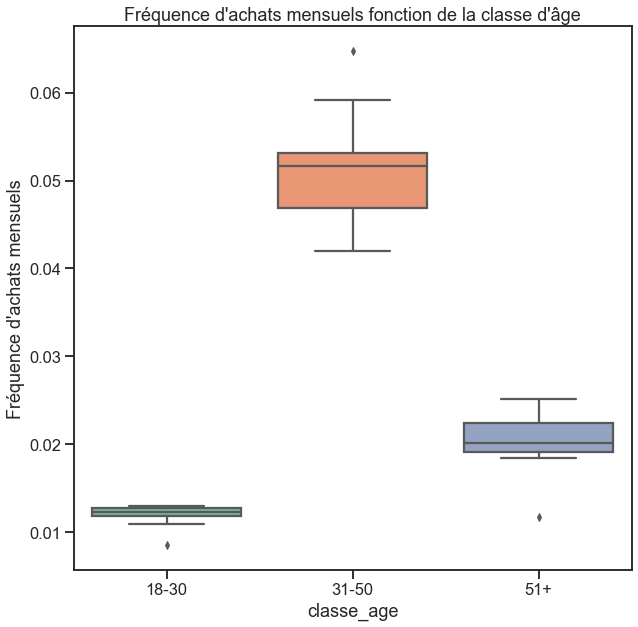

In [42]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='classe_age', y='freq_achat', data=df_freq)
_ = plt.ylabel('Fréquence d\'achats mensuels')
_ = plt.title('Fréquence d\'achats mensuels fonction de la classe d\'âge')

_ = plt.savefig('14 - Fréquence anova achat par age.jpg')

_ = plt.show()

In [43]:
X = df_freq['classe_age']
Y = df_freq['freq_achat']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.9450062071204192


Cet eta² montre une importante corrélation entre la classe d'âge et la fréquence d'achat, et l'on constate sur le graphique que ce sont les 31-50 qui achètent le plus fréquemment.

4.4 - Corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

In [44]:
pd.set_option('mode.chained_assignment', None)
cols = ['session_id', 'id_prod']
df_pan_count = df[cols]
df_pan_count['taille_panier'] = 1
df_pan_count = df_pan_count.sort_values('session_id')
df_pan_count = df_pan_count.groupby('session_id').sum().reset_index()

cols_2 = ['session_id', 'id_prod', 'client_id', 'age', 'classe_age']
df_pan_moy = df[cols_2]
df_pan_moy = pd.merge(df_pan_moy, df_pan_count, on = 'session_id')
df_pan_count
df_pan_moy.head()

,session_id,id_prod,client_id,age,classe_age,taille_panier
0,s_1,0_1259,c_329,55,51+,1
1,s_149171,0_1259,c_1478,50,31-50,4
2,s_149171,1_406,c_1478,50,31-50,4
3,s_149171,0_1826,c_1478,50,31-50,4
4,s_149171,1_718,c_1478,50,31-50,4


In [45]:
x = df_pan_moy['age']
y = df_pan_moy['taille_panier']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_pan_moy['taille_panier']
X = df_pan_moy[['age']]
X = X.copy() 
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.16086653004136095
indice de covariation : -3.6224216947857952
r-squared :  0.025878040487548087


<Figure size 720x720 with 0 Axes>

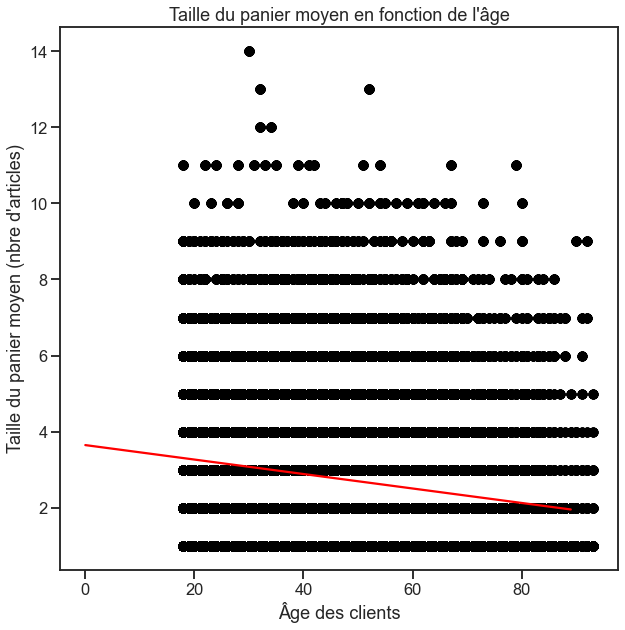

In [46]:
sns.set_context('talk')
sns.set_palette('Set1')
plt.figure(figsize=[10,10])

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_pan_moy.age,df_pan_moy.taille_panier, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Âge des clients")
_ = plt.ylabel("Taille du panier moyen (nbre d'articles)")
_ = plt.title('Taille du panier moyen en fonction de l\'âge')

_ = plt.savefig('15 - Régression panier moyen par age.jpg')

_ = plt.show()

Le coefficient de Pearson et le R² ne montrent aucune corrélation entre l'âge des clients et la taille du panier.

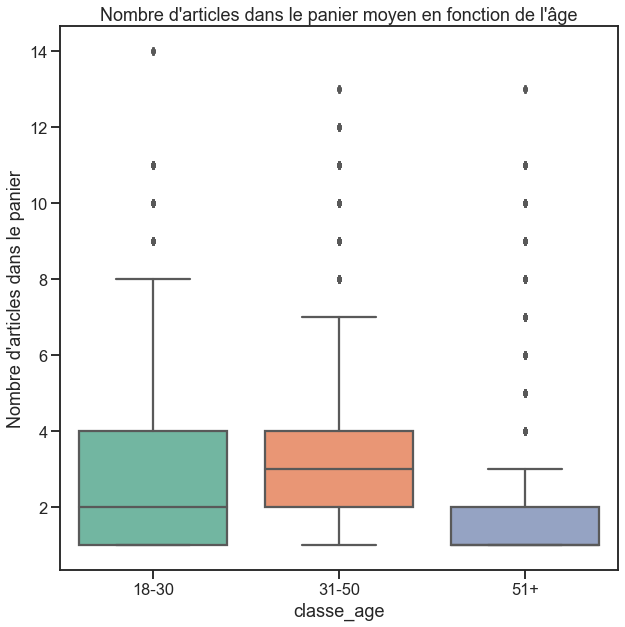

In [47]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='classe_age', y='taille_panier', data=df_pan_moy)
_ = plt.ylabel('Nombre d\'articles dans le panier')
_ = plt.title('Nombre d\'articles dans le panier moyen en fonction de l\'âge')

_ = plt.savefig('16 - Anova panier moyen par age.jpg')

_ = plt.show()

In [48]:
X = df_pan_moy['classe_age'] # qualitative
Y = df_pan_moy['taille_panier'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.06168989573959316


Le coefficient eta² montre une légère corrélation entre la classe d'âge et la fréquence d'achat.

4.5 - Corrélation entre l'âge des clients et les catégories de produits achetés

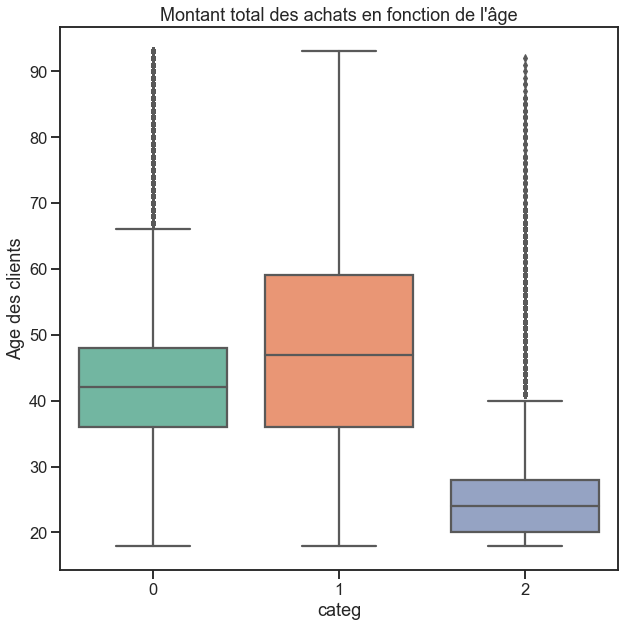

In [49]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='categ', y='age', data=df)
_ = plt.ylabel('Age des clients')
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig('17 - Anova catégorie par age.jpg')

_ = plt.show()

In [50]:
X = df['categ']
Y = df['age']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.1127902993231092


Le coefficient eta² montre une forte corrélation entre l'âge des clients et la catégorie d'achat. Les clients les plus jeunes achètent principalement des produits de la catégorie 2, tandis que les autres deux autres catégories de produits sont achetées indistinctement par les clients.